In [5]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [7]:
ls


 Volume in drive C has no label.
 Volume Serial Number is ECD7-FC17

 Directory of C:\Users\Admin\Desktop\SLR

26/12/2022  06:20    <DIR>          .
26/12/2022  06:20    <DIR>          ..
26/12/2022  05:51    <DIR>          .ipynb_checkpoints
26/12/2022  05:36               218 delivery_time.csv
26/12/2022  02:42               454 Salary_Data.csv
26/12/2022  06:20             3,355 SLR Prob1.ipynb
26/12/2022  05:33           156,033 SLR Prob2.ipynb
               4 File(s)        160,060 bytes
               3 Dir(s)  125,196,029,952 bytes free


In [9]:
DT1=pd.read_csv("delivery_time.csv")
DT1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
DT=DT1.rename(columns={"Delivery Time":"Deliverytime","Sorting Time":"Sortingtime"})
DT

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


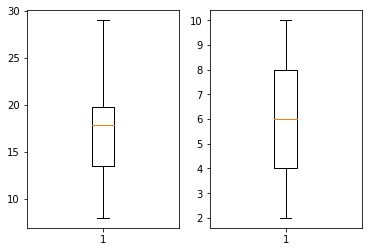

In [13]:
plt.subplot(1,2,1)
plt.boxplot(DT.Deliverytime)
plt.subplot(1,2,2)
plt.boxplot(DT.Sortingtime)
plt.show()
#no outliers

In [12]:
model1=smf.ols("Deliverytime~Sortingtime",data=DT).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        19:12:35   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model1.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sortingtime', ylabel='Deliverytime'>

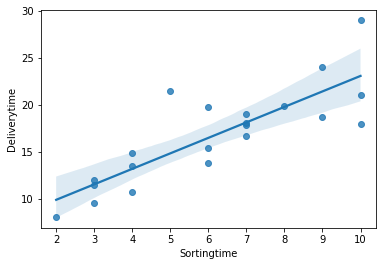

In [22]:
sns.regplot(DT.Sortingtime,DT.Deliverytime)

In [19]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Deliverytime  21 non-null     float64
 1   Sortingtime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


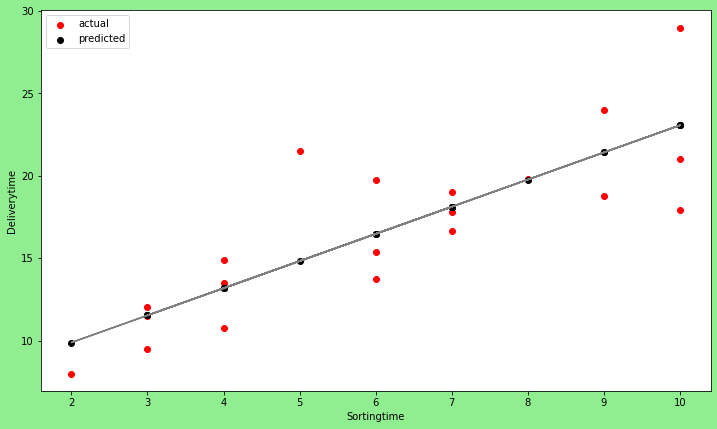

In [21]:
plt.figure(figsize=(12,7),facecolor="lightgreen")
plt.scatter(DT.Sortingtime,DT.Deliverytime,color="Red",label="actual")
plt.plot(DT.Sortingtime,model1.predict(),color="grey")
plt.scatter(DT.Sortingtime,model1.predict(),color="black",label="predicted")
plt.xlabel("Sortingtime")
plt.ylabel("Deliverytime")
plt.legend(loc="best")
plt.show()

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                        19:33:33   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2=smf.ols("Deliverytime~np.log(Sortingtime)",data=DT).fit()
model2.predict()

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [27]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                        19:37:48   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

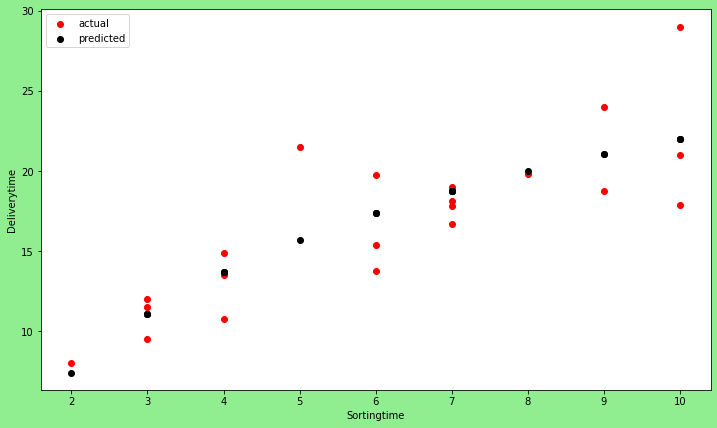

In [29]:
plt.figure(figsize=(12,7),facecolor="lightgreen")
plt.scatter(DT.Sortingtime,DT.Deliverytime,color="red",label="actual")
plt.scatter(DT.Sortingtime,model2.predict(),color="black",label="predicted")
#plt.plot(DT.Sortingtime,model2.predict(),color="grey")
plt.xlabel("Sortingtime")
plt.ylabel("Deliverytime")
plt.legend(loc="best")
plt.show()

In [30]:
model3=smf.ols("Deliverytime~np.exp(Sortingtime)",data=DT).fit()


In [31]:
model3.predict()

array([23.73908236, 15.10503289, 15.24210913, 18.26776013, 23.73908236,
       15.24210913, 15.51451022, 15.09147084, 23.73908236, 18.26776013,
       16.25497317, 15.10503289, 15.51451022, 15.09147084, 15.09147084,
       15.10503289, 15.24210913, 15.51451022, 15.08648164, 15.51451022,
       15.14189837])

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Mon, 26 Dec 2022   Prob (F-statistic):            0.00396
Time:                        19:51:20   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Sortingtime)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

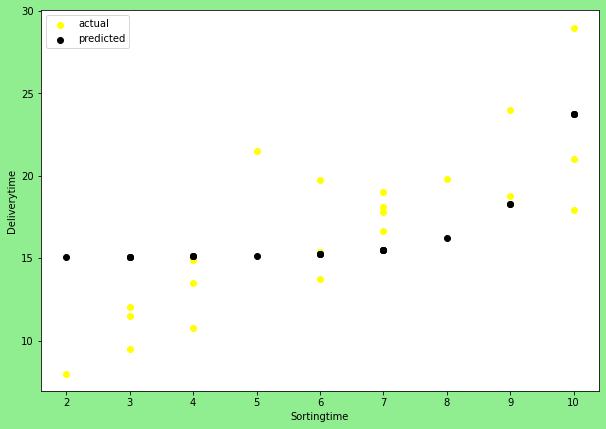

In [34]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(DT.Sortingtime,DT.Deliverytime,color="Yellow",label="actual")
plt.scatter(DT.Sortingtime,model3.predict(),label="predicted",color="Black")
#plt.plot(DT.Sortingtime,model3.predict(),label="predicted",color="Black")
plt.ylabel("Deliverytime")
plt.xlabel("Sortingtime")
plt.legend(loc="best")
plt.show()

In [35]:
DT["Sortingtime_Sq"] = DT.Sortingtime**2
DT["Sortingtime_Sq"]

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: Sortingtime_Sq, dtype: int64

In [40]:
model4=smf.ols("Deliverytime~Sortingtime+Sortingtime_Sq",data=DT).fit()


In [41]:
model4.predict()

array([22.33242955, 13.28306918, 17.04510832, 21.29019387, 22.33242955,
       17.04510832, 18.64653326, 11.12245499, 22.33242955, 21.29019387,
       20.06156177, 13.28306918, 18.64653326, 11.12245499, 11.12245499,
       13.28306918, 17.04510832, 18.64653326,  8.77544437, 18.64653326,
       15.25728696])

In [42]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           2.39e-05
Time:                        19:58:48   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5222      4.160      0.847      0.408      -5.217      12.261
Sortingtime        2.8130      1.461      1.926      0.070      -0.256       5.882
Sortingtime_Sq    -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Since the R-squared value of model2 is 0.695, which is greater when compared to all the other models so we consider model2 as the best one.